<a href="https://colab.research.google.com/github/TomisinT99/boston-housing-analysis/blob/main/Lab2_ALY6110.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

file_path = list(uploaded.keys())[0]

Saving BostonHousing.csv to BostonHousing.csv


In [5]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=c7bd19787850c4d64202595b7e79e2ef3134a7754e99da116b2dfb509cc49cf5
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [7]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, mean, stddev, count
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
spark = SparkSession.builder.appName("BostonHousing.csv").getOrCreate()


In [9]:
from google.colab import files
uploaded = files.upload()

file_path = list(uploaded.keys())[0]

Saving BostonHousing.csv to BostonHousing (1).csv


In [10]:
import pandas as pd
import numpy as np
#Loading and indexing the dataset
boston= pd.read_csv('BostonHousing.csv')
print(boston.head())

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [11]:
#Checking for missing values and dropping if there are any.
print(boston.isnull().sum())
boston = boston.dropna()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


In [12]:
#There is a column of 'rm' and we are trying to check the range.
print(max(boston['rm']))
print(min(boston['rm']))

8.78
3.561


In [13]:
pip install pyspark

In [14]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, mean
#Initialize Spark Session
spark = SparkSession.builder.appName("BostonHousing").getOrCreate()
#Loading the data
data = spark.read.csv("BostonHousing.csv", sep=",", header = True, inferSchema=True)


In [15]:
#Printing the schema
data.printSchema()

root
 |-- crim: double (nullable = true)
 |-- zn: double (nullable = true)
 |-- indus: double (nullable = true)
 |-- chas: integer (nullable = true)
 |-- nox: double (nullable = true)
 |-- rm: double (nullable = true)
 |-- age: double (nullable = true)
 |-- dis: double (nullable = true)
 |-- rad: integer (nullable = true)
 |-- tax: integer (nullable = true)
 |-- ptratio: double (nullable = true)
 |-- b: double (nullable = true)
 |-- lstat: double (nullable = true)
 |-- medv: double (nullable = true)



In [16]:
# Data Preparation
data = data.na.drop()

#Binning based for RM. Why? Because we are converting all the floating points into integer bins for better understanding.
bins = [3, 4, 5, 6, 7, 8, 9]
#The below line creates a new column 'rm_bin' and stores the values as integers
data = data.withColumn("rm_bin", col("rm").cast("int"))

#Calculate statistics for each bin
statistics = data.groupBy("rm_bin").agg(
    mean("medv").alias("average_medv"),
    mean("age").alias("average_age"),
    mean("tax").alias("average_tax")
)

# Sort the statistics DataFrame by rm_bin and display
statistics = statistics.orderBy("rm_bin")
statistics.show()

+------+------------------+------------------+------------------+
|rm_bin|      average_medv|       average_age|       average_tax|
+------+------------------+------------------+------------------+
|     3|              25.3|             93.95|             666.0|
|     4|16.023076923076925| 93.37692307692308| 597.6923076923077|
|     5|17.487341772151893| 74.59620253164557| 428.7278481012658|
|     6| 22.01598513011151| 65.53866171003715|407.97026022304834|
|     7|36.917647058823526|57.862745098039234|308.96078431372547|
|     8|              44.2| 71.53846153846153| 325.0769230769231|
+------+------------------+------------------+------------------+



In [17]:
#Convert PySpark DataFrame to Pandas DataFrame for plotting(Essential Step)
statistics_pd = statistics.toPandas()


In [18]:
import matplotlib.pyplot as plt

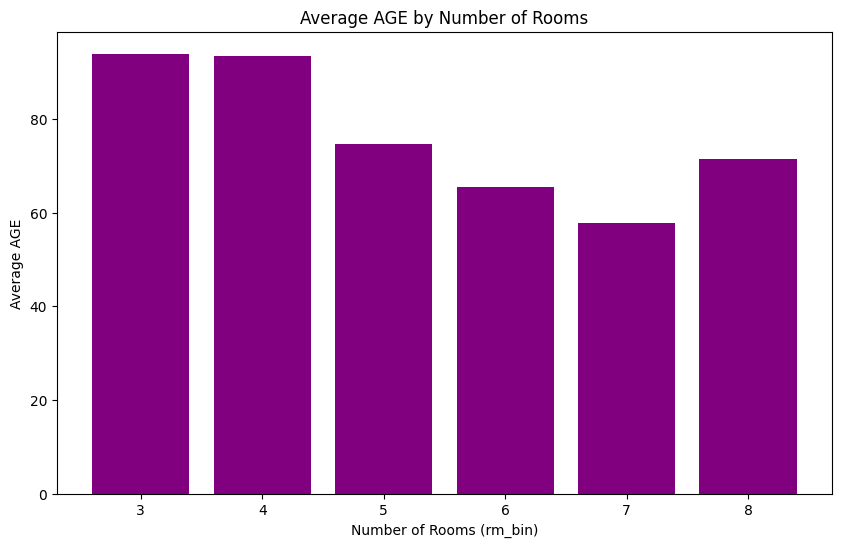

In [19]:
#Bar chart for average_AGE
plt.figure(figsize=(10, 6))
plt.bar(statistics_pd['rm_bin'], statistics_pd['average_age'], color='purple')
plt.xlabel('Number of Rooms (rm_bin)')
plt.ylabel('Average AGE')
plt.title('Average AGE by Number of Rooms')
plt.show()

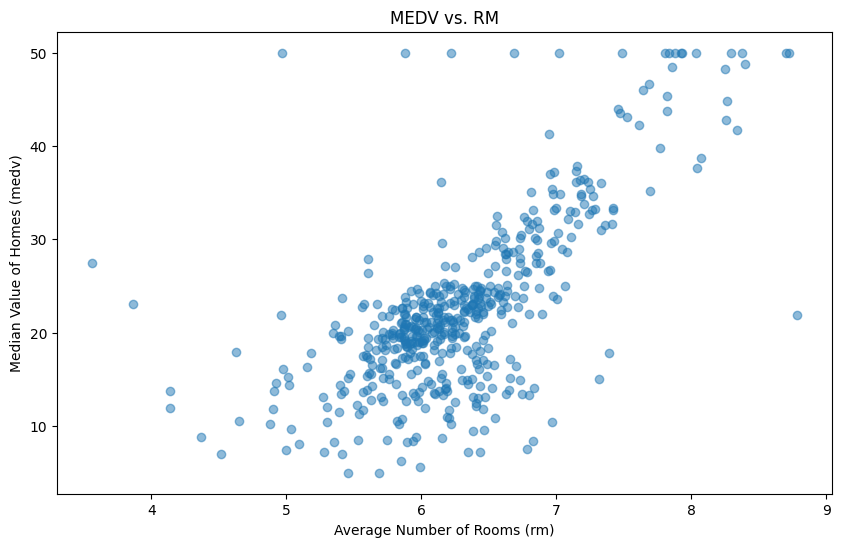

In [20]:
# Scatter plot of MEDV vs. RM
plt.figure(figsize=(10, 6))
plt.scatter (data.toPandas()['rm'], data.toPandas()['medv'], alpha=0.5)
plt.xlabel('Average Number of Rooms (rm)')
plt.ylabel('Median Value of Homes (medv)')
plt.title('MEDV vs. RM')
plt.show()

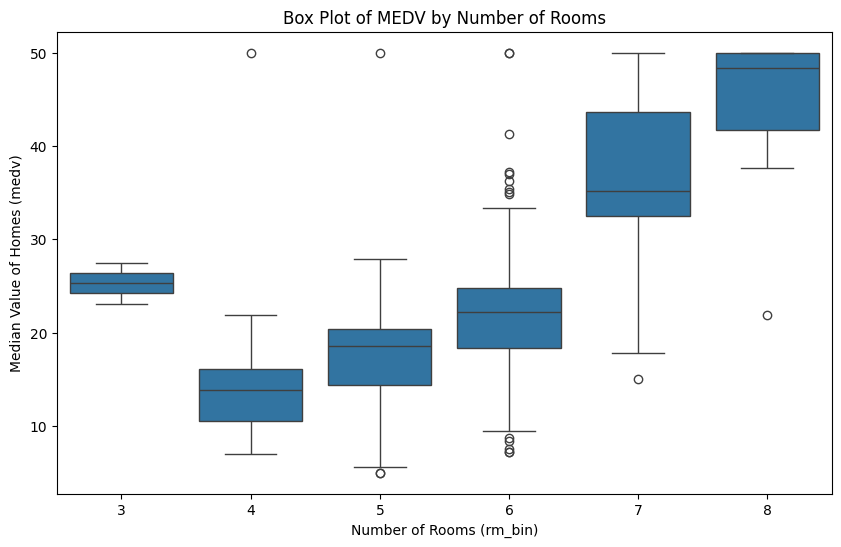

In [21]:
import seaborn as sns
# Box plot of MEDV by RM_bin
plt.figure(figsize=(10, 6))
data_pd = data.toPandas()
data_pd['rm_bin'] = data_pd['rm'].astype(int)
sns.boxplot(x='rm_bin', y='medv', data=data_pd)
plt.xlabel('Number of Rooms (rm_bin)')
plt.ylabel('Median Value of Homes (medv)')
plt.title('Box Plot of MEDV by Number of Rooms')
plt.show()

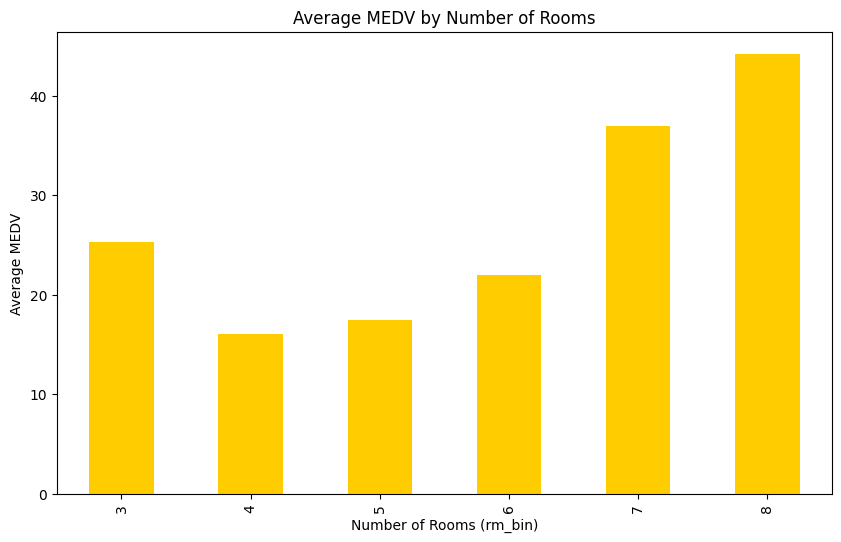

In [22]:
#Bar chart for average_medv
statistics_pd.plot(
    kind='bar',
    x='rm_bin',
    y='average_medv',
    color='#FFCC00',  # Tangerine color in hex
    legend=False,
    figsize=(10, 6)
)
plt.xlabel('Number of Rooms (rm_bin)')
plt.ylabel('Average MEDV')
plt.title('Average MEDV by Number of Rooms')
plt.show()
